170498071/170498071 [==============================] - 3s 0us/step


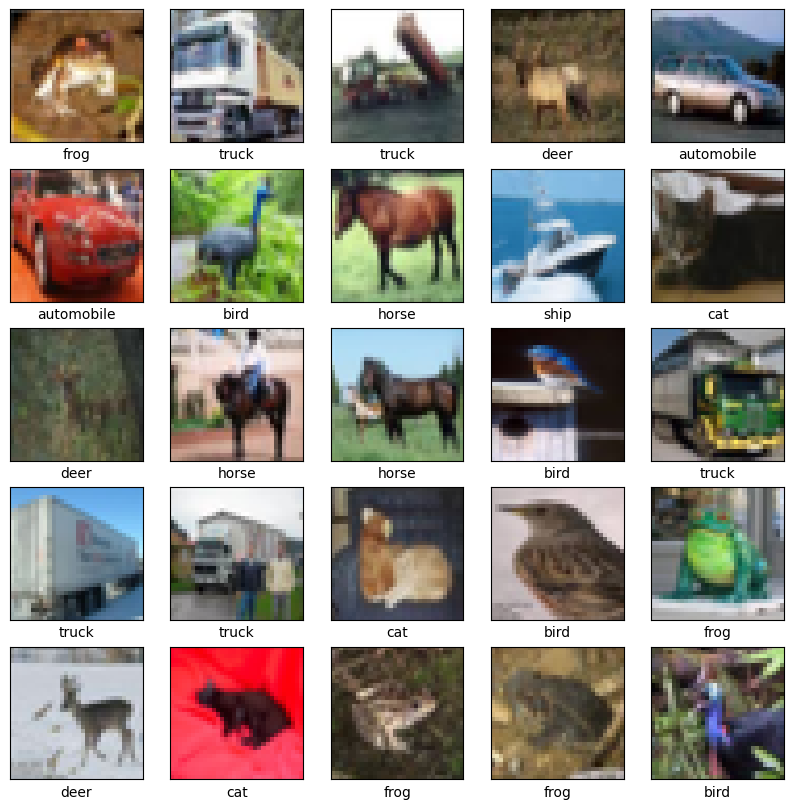

In [ ]:
# taken from TF tutorial: https://www.tensorflow.org/tutorials/images/cnn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model_q2 = tf.keras.Sequential([
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.Flatten(),
      layers.Dropout(0.2),
      layers.Dense(64, activation = "relu"),
      layers.BatchNormalization(),
      layers.Dense(64, activation = "relu"),
      layers.Dense(10)
  ])

model_q2.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


batch_size = 30
model_q2.fit(train_images, train_labels, epochs=10, batch_size = batch_size)

test_loss, test_acc = model_q2.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1667/1667 [==============================] - 25s 7ms/step - loss: 1.4476 - accuracy: 0.4729
Epoch 2/10
1667/1667 [==============================] - 13s 8ms/step - loss: 1.1141 - accuracy: 0.6063
Epoch 3/10
1667/1667 [==============================] - 10s 6ms/step - loss: 0.9830 - accuracy: 0.6522
Epoch 4/10
1667/1667 [==============================] - 10s 6ms/step - loss: 0.9034 - accuracy: 0.6827
Epoch 5/10
1667/1667 [==============================] - 8s 5ms/step - loss: 0.8469 - accuracy: 0.7038
Epoch 6/10
1667/1667 [==============================] - 10s 6ms/step - loss: 0.8044 - accuracy: 0.7186
Epoch 7/10
1667/1667 [==============================] - 10s 6ms/step - loss: 0.7674 - accuracy: 0.7320
Epoch 8/10
1667/1667 [==============================] - 8s 5ms/step - loss: 0.7385 - accuracy: 0.7426
Epoch 9/10
1667/1667 [==============================] - 10s 6ms/step - loss: 0.7143 - accuracy: 0.7506
Epoch 10/10
1667/1667 [==============================] - 10s 6ms/step - los

313/313 [==============================] - 1s 3ms/step


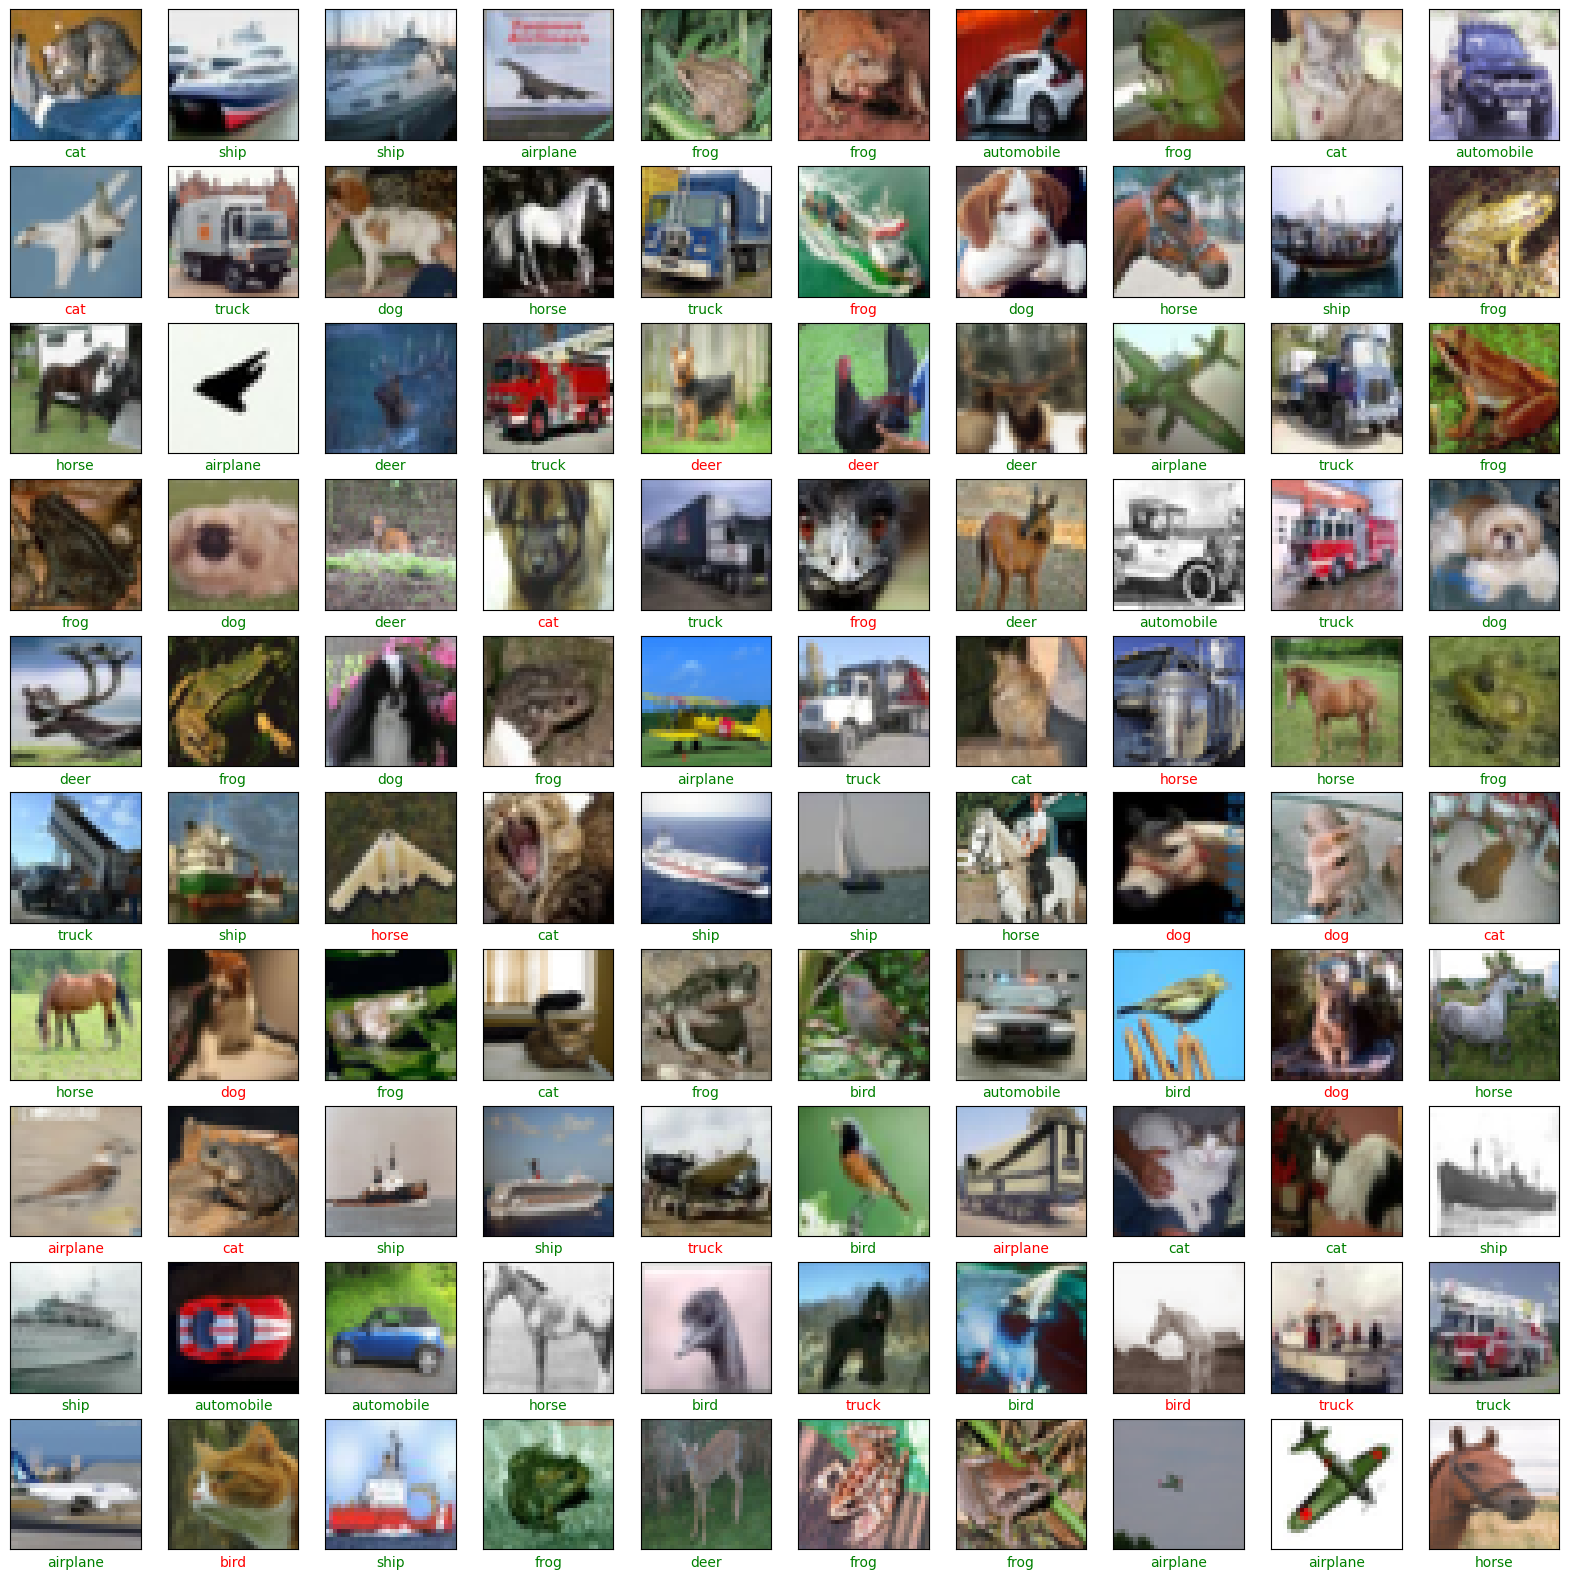

In [ ]:
import numpy as np
arr = model_q2.predict(test_images)
plt.figure(figsize=(20,20))
for i in range(100):
    sub = plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[np.argmax(arr[i])])
    sub.xaxis.label.set_color('green' if (np.argmax(arr[i]) == test_labels[i][0]) else 'red')
plt.show()